In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp
import geopandas as gpd

## Data Import

In [2]:
car_df = pd.read_csv('car-assignments.csv')
gps_df = pd.read_csv('gps.csv')
loyalty_df = pd.read_csv('loyalty_data.csv', encoding='cp1252')
cc_df = pd.read_csv('cc_data.csv', encoding='cp1252')

In [3]:
car_df.head()

,LastName,FirstName,CarID,CurrentEmploymentType,CurrentEmploymentTitle
0,Alcazar,Lucas,1.0,Information Technology,IT Helpdesk
1,Azada,Lars,2.0,Engineering,Engineer
2,Balas,Felix,3.0,Engineering,Engineer
3,Barranco,Ingrid,4.0,Executive,SVP/CFO
4,Baza,Isak,5.0,Information Technology,IT Technician


In [4]:
gps_df.head()

,Timestamp,id,lat,long
0,01/06/2014 06:28:01,35,36.076225,24.874689
1,01/06/2014 06:28:01,35,36.076220,24.874596
2,01/06/2014 06:28:03,35,36.076211,24.874443
3,01/06/2014 06:28:05,35,36.076217,24.874253
4,01/06/2014 06:28:06,35,36.076214,24.874167


In [5]:
loyalty_df.head()

,timestamp,location,price,FirstName,LastName
0,1/6/2014,Brew've Been Served,4.17,Cornelia,Lais
1,1/6/2014,Brew've Been Served,9.60,Mat,Bramar
2,1/6/2014,Hallowed Grounds,16.53,Emile,Arpa
3,1/6/2014,Coffee Shack,11.51,Varro,Awelon
4,1/6/2014,Hallowed Grounds,12.93,Rachel,Pantanal


In [6]:
cc_df.head()

,timestamp,location,price,FirstName,LastName
0,1/6/2014 7:28,Brew've Been Served,11.34,Edvard,Vann
1,1/6/2014 7:34,Hallowed Grounds,52.22,Hideki,Cocinaro
2,1/6/2014 7:35,Brew've Been Served,8.33,Stenig,Fusil
3,1/6/2014 7:36,Hallowed Grounds,16.72,Birgitta,Frente
4,1/6/2014 7:37,Brew've Been Served,4.24,Sven,Flecha


## Data Exploration

In [7]:
car_df.dtypes

LastName                   object
FirstName                  object
CarID                     float64
CurrentEmploymentType      object
CurrentEmploymentTitle     object
dtype: object

In [8]:
for col in car_df:
    print(col,"\n", pd.unique(car_df[col]), "\n\n")

LastName 
 ['Alcazar' 'Azada' 'Balas' 'Barranco' 'Baza' 'Bergen' 'Borrasca' 'Calixto'
 'Calzas' 'Campo-Corrente' 'Cazar' 'Cocinaro' 'Ferro' 'Dedos' 'Bodrogi'
 'Vann' 'Flecha' 'Frente' 'Fusil' 'Osvaldo' 'Herrero' 'Lagos' 'Mies'
 'Nubarron' 'Onda' 'Orilla' 'Ovan' 'Resumir' 'Sanjorge Jr.' 'Strum'
 'Tempestad' 'Vasco-Pais' 'Hafon' 'Hawelon' 'Morlun' 'Morluniau' 'Nant'
 'Scozzese'] 


FirstName 
 ['Lucas' 'Lars' 'Felix' 'Ingrid' 'Isak' 'Linnea' 'Isande' 'Nils' 'Axel'
 'Ada' 'Gustav' 'Hideki' 'Inga' 'Lidelse' 'Loreto' 'Isia' 'Sven'
 'Birgitta' 'Vira' 'Stenig' 'Hennie' 'Kanon' 'Varja' 'Minke' 'Adra'
 'Marin' 'Kare' 'Elsa' 'Bertrand' 'Sten' 'Orhan' 'Brand' 'Edvard' 'Willem'
 'Albina' 'Benito' 'Claudio' 'Henk' 'Valeria' 'Adan' 'Cecilia' 'Irene'
 'Dylan'] 


CarID 
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. nan] 


CurrentEmploymentType 
 ['Information Technology' 'Engineering' 'Executive' 'Securi

In [9]:
car_df['CurrentEmploymentType'] = car_df['CurrentEmploymentType'].astype('category')
car_df['CurrentEmploymentTitle'] = car_df['CurrentEmploymentTitle'].astype('category')

In [10]:
car_df.dtypes

LastName                    object
FirstName                   object
CarID                      float64
CurrentEmploymentType     category
CurrentEmploymentTitle    category
dtype: object

In [11]:
loyalty_df.dtypes

timestamp     object
location      object
price        float64
FirstName     object
LastName      object
dtype: object

In [12]:
loyalty_df['location'] = loyalty_df['location'].astype('category')

In [13]:
for col in loyalty_df:
    print(col,"\n", pd.unique(loyalty_df[col]), "\n\n")

timestamp 
 ['1/6/2014' '1/7/2014' '1/8/2014' '1/9/2014' '1/10/2014' '1/11/2014'
 '1/12/2014' '1/13/2014' '1/14/2014' '1/15/2014' '1/16/2014' '1/17/2014'
 '1/18/2014' '1/19/2014'] 


location 
 ['Brew've Been Served', 'Hallowed Grounds', 'Coffee Shack', 'Abila Zacharo', 'Hippokampos', ..., 'Frank's Fuel', 'Chostus Hotel', 'Ahaggo Museum', 'Desafio Golf Course', 'Roberts and Sons']
Length: 33
Categories (33, object): ['Abila Airport', 'Abila Scrapyard', 'Abila Zacharo', 'Ahaggo Museum', ..., 'Roberts and Sons', 'Shoppers' Delight', 'Stewart and Sons Fabrication', 'U-Pump'] 


price 
 [  4.17   9.6   16.53 ...  35.01 110.02  63.17] 


FirstName 
 ['Cornelia' 'Mat' 'Emile' 'Varro' 'Rachel' 'Ruscella' 'Linda' 'Dante'
 'Carla' 'Anda' 'Lucas' 'Lars' 'Felix' 'Ingrid' 'Isak' 'Linnea' 'Loreto'
 'Isande' 'Nils' 'Axel' 'Ada' 'Gustav' 'Hideki' 'Lidelse' 'Inga' 'Sven'
 'Birgitta' 'Vira' 'Stenig' 'Albina' 'Kanon' 'Varja' 'Henk' 'Minke'
 'Cecilia' 'Adra' 'Marin' 'Elsa' 'Kare' 'Hennie' 'Bertrand' 'Orh

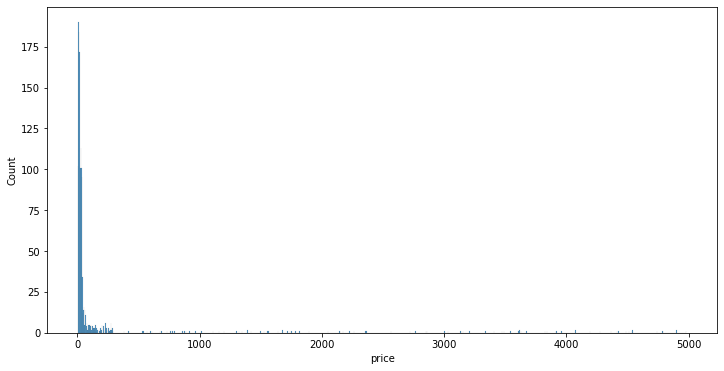

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(loyalty_df['price'], ax=ax)
plt.show()

In [28]:
outlier_purchase = loyalty_df.loc[loyalty_df['price'] > 1000]
outlier_purchase.head()

,timestamp,location,price,FirstName,LastName
331,1/6/2014,Carlyle Chemical Inc.,3959.66,Albina,Hafon
332,1/6/2014,Abila Airport,4540.08,Albina,Hafon
335,1/6/2014,Maximum Iron and Steel,2859.51,Albina,Hafon
347,1/6/2014,Stewart and Sons Fabrication,2144.62,Cecilia,Morluniau
423,1/7/2014,Abila Airport,3840.37,Benito,Hawelon


In [29]:
for col in outlier_purchase:
    print(col,"\n", pd.unique(outlier_purchase[col]), "\n\n")

timestamp 
 ['1/6/2014' '1/7/2014' '1/8/2014' '1/9/2014' '1/10/2014' '1/13/2014'
 '1/14/2014' '1/15/2014' '1/16/2014' '1/17/2014'] 


location 
 ['Carlyle Chemical Inc.', 'Abila Airport', 'Maximum Iron and Steel', 'Stewart and Sons Fabrication', 'Nationwide Refinery', 'Kronos Pipe and Irrigation', 'Abila Scrapyard']
Categories (33, object): ['Abila Airport', 'Abila Scrapyard', 'Abila Zacharo', 'Ahaggo Museum', ..., 'Roberts and Sons', 'Shoppers' Delight', 'Stewart and Sons Fabrication', 'U-Pump'] 


price 
 [3959.66 4540.08 2859.51 2144.62 3840.37 1200.9  3411.29 3827.2  1562.66
 1347.36 1783.33 3920.82 3207.31 2149.28 1641.96 2723.18 2769.12 4513.16
 1738.26 4901.88 4367.43 3674.32 1673.77 4983.52 3615.61 3136.01 2358.22
 1420.39 1015.65 4538.52 2176.2  3544.   1527.14 1158.36 4792.5  1322.5
 2262.73 4195.49 1552.82 4074.1  3489.36 1718.96 3617.47 2852.74 4417.03
 2228.08 4071.95 2369.56 1301.01 4898.39 3630.57 3470.99 4277.4  3339.21
 4429.76 3152.41 4485.38 3608.08 1112.04 1392.73 3

In [30]:
employee_outlier_purchase = car_df.loc[car_df['FirstName'].isin(['Albina','Cecilia','Benito','Henk','Valeria','Irene','Dylan','Adan'
,'Claudio'])]
employee_outlier_purchase

,LastName,FirstName,CarID,CurrentEmploymentType,CurrentEmploymentTitle
35,Hafon,Albina,NaN,Facilities,Truck Driver
36,Hawelon,Benito,NaN,Facilities,Truck Driver
37,Hawelon,Claudio,NaN,Facilities,Truck Driver
38,Mies,Henk,NaN,Facilities,Truck Driver
39,Morlun,Valeria,NaN,Facilities,Truck Driver
40,Morlun,Adan,NaN,Facilities,Truck Driver
41,Morluniau,Cecilia,NaN,Facilities,Truck Driver
42,Nant,Irene,NaN,Facilities,Truck Driver
43,Scozzese,Dylan,NaN,Facilities,Truck Driver


In [31]:
outlier_purchase_suspicious = outlier_purchase.loc[outlier_purchase['LastName'] == 'Mies']
outlier_purchase_suspicious

,timestamp,location,price,FirstName,LastName
430,1/7/2014,Abila Airport,3411.29,Henk,Mies
526,1/8/2014,Abila Airport,2723.18,Henk,Mies
527,1/8/2014,Abila Airport,2769.12,Henk,Mies
621,1/9/2014,Abila Airport,4538.52,Henk,Mies
887,1/13/2014,Abila Airport,4417.03,Henk,Mies
888,1/13/2014,Abila Airport,2228.08,Henk,Mies
978,1/14/2014,Abila Airport,4898.39,Henk,Mies
1071,1/15/2014,Abila Airport,3152.41,Henk,Mies
1174,1/16/2014,Abila Airport,3917.30,Henk,Mies
1175,1/16/2014,Abila Airport,3032.97,Henk,Mies


### Note - potential suspicious discrepancies. Very large outliers in price, worth investigating location these purchases were made to see if it makes sense. Only Truck drivers ever made single purchases over 1000 dollars. None of these people have assigned company cars.  

## Shapefile Experiments

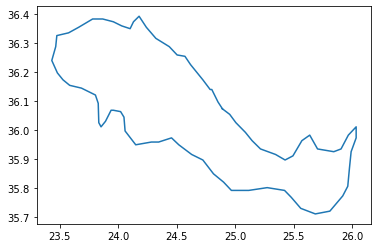

In [18]:
sf = shp.Reader("Geospatial/Kronos_Island.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

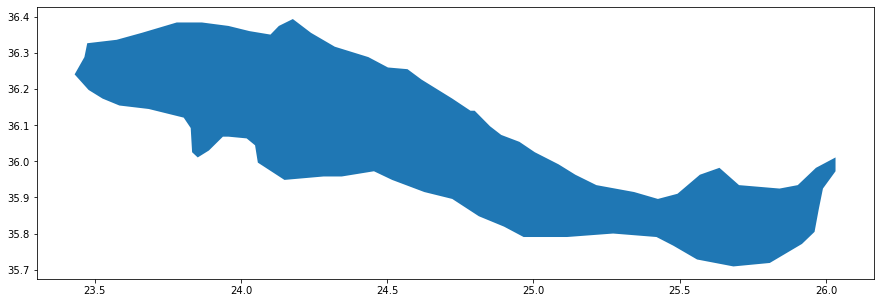

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
file_path = 'Geospatial/Kronos_Island.shp'
map_df = gpd.read_file(file_path)
map_df.plot(ax=ax)
plt.show()

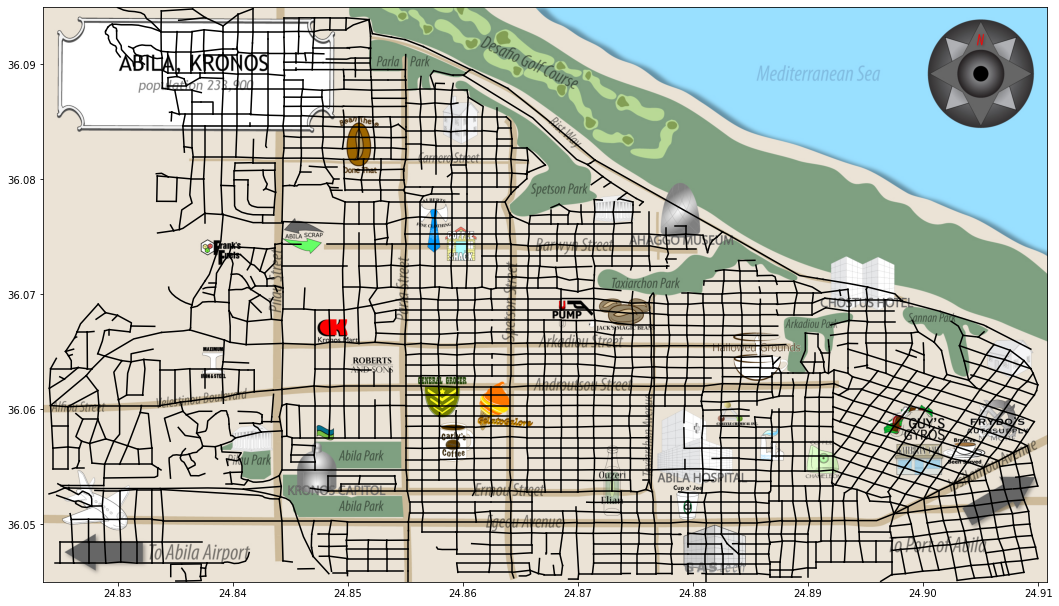

In [20]:
sf = shp.Reader("Geospatial/Abila.shp")

img = plt.imread("map-tourist.jpg")
fig, ax = plt.subplots(figsize=(18,18))
ax.imshow(img, extent=[24.8235, 24.9108, 36.045, 36.095])
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax = plt.plot(x,y, color ='k')
plt.show()

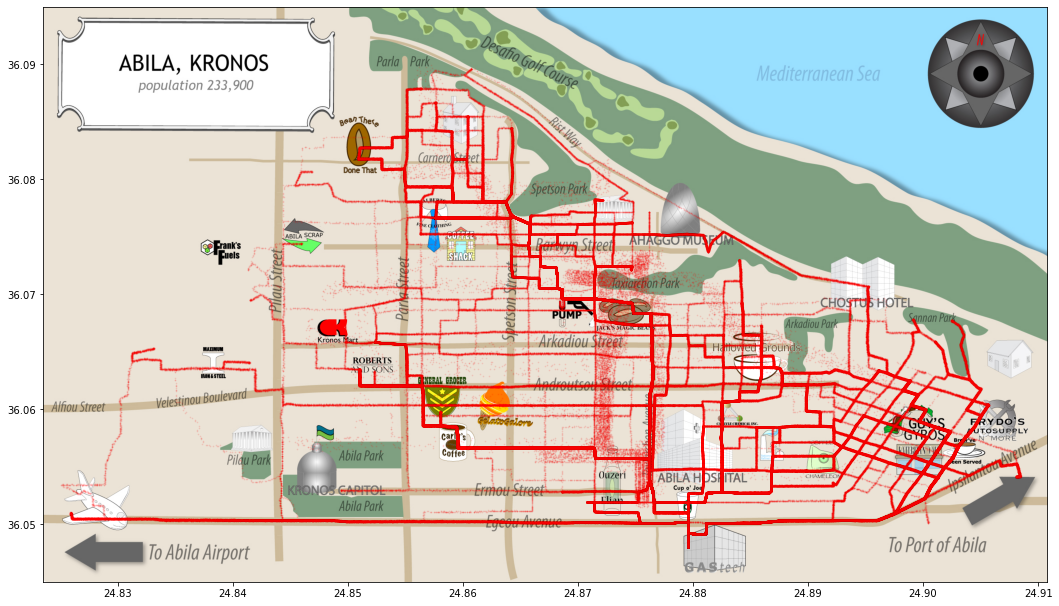

In [21]:
img = plt.imread("map-tourist.jpg")
fig, ax = plt.subplots(figsize=(18,18))
ax.imshow(img, extent=[24.8235, 24.9108, 36.045, 36.095])

ax = plt.scatter(gps_df['long'].values, gps_df['lat'].values, color='red', s=0.5, label='train', alpha=0.1)
plt.show()

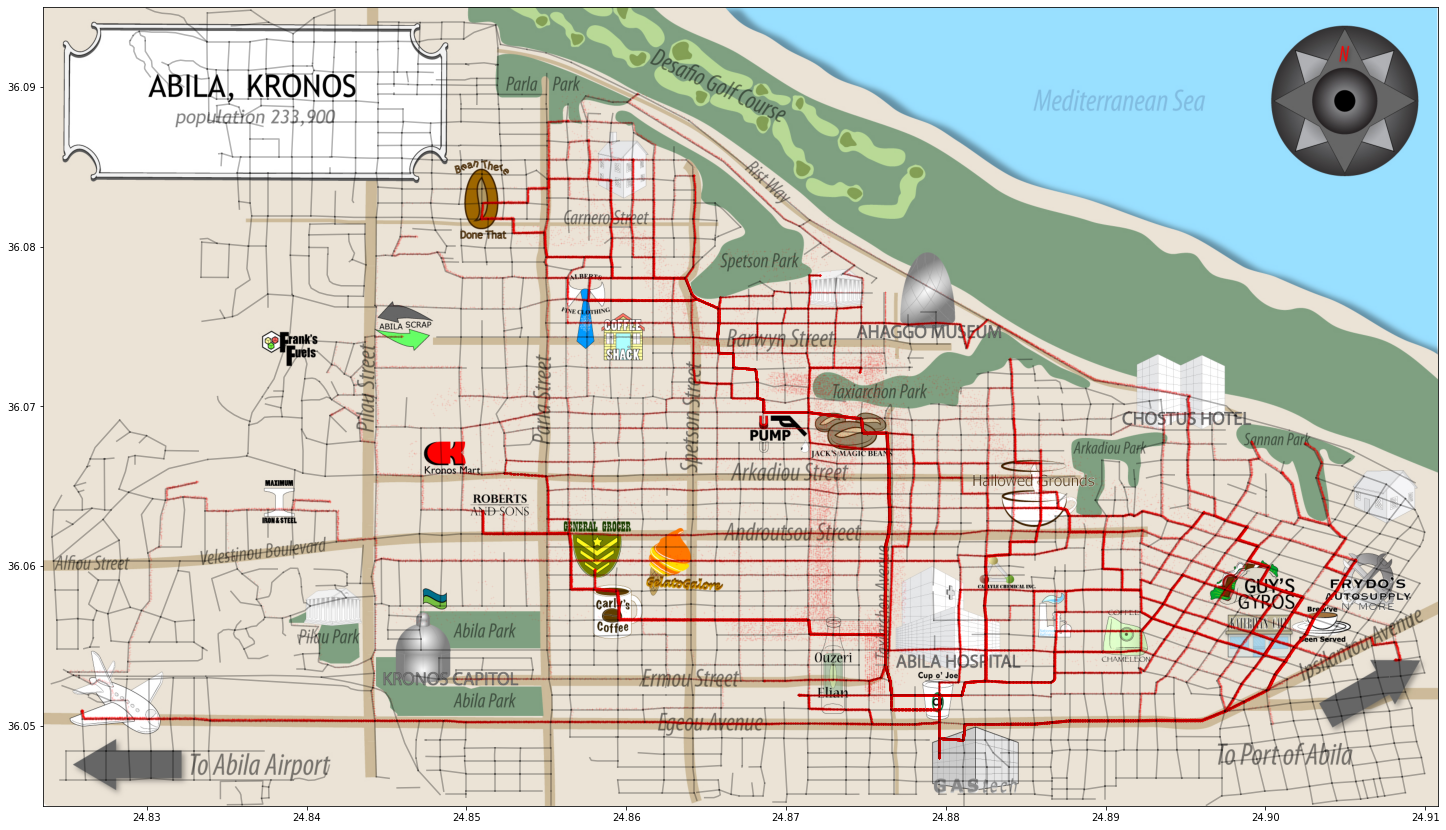

In [22]:
sf = shp.Reader("Geospatial/Abila.shp")

img = plt.imread("map-tourist.jpg")
fig, ax = plt.subplots(figsize=(25,20))
ax.imshow(img, extent=[24.8235, 24.9108, 36.045, 36.095])
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax = plt.plot(x,y, color ='k', alpha=0.3)

ax = plt.scatter(gps_df['long'].values, gps_df['lat'].values, color='red', s=0.5, label='train', alpha=0.05)

plt.show()